In [107]:
import pandas as pd
import matplotlib as plm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import median

# Cleaning e manipolazione dataset

In [108]:
df = pd.read_csv('compitino_dataviz_2021_2022.csv')
df

,nome_modulistica,score_preop,score_postop,condizioni_meteo,sesso,anni_ricovero,temperatura_media,umidita_media,HI > 27,natural_light
0,SF12 PhysicalScore,27.60,37.40,poco nuvoloso,F,70,20.0,69.0,False,True
1,SF12 MentalScore,54.36,58.46,poco nuvoloso,F,70,20.0,69.0,False,True
2,SF12 PhysicalScore,28.15,38.25,poco nuvoloso,M,69,18.0,65.0,False,True
3,SF12 MentalScore,57.02,64.62,poco nuvoloso,M,69,18.0,65.0,False,True
4,SF12 PhysicalScore,31.57,55.67,poco nuvoloso,M,70,23.0,74.0,False,True
...,...,...,...,...,...,...,...,...,...,...
2105,SF12 MentalScore,57.54,62.34,nebbia al mattino,M,70,20.0,71.0,True,True
2106,SF12 PhysicalScore,32.20,37.10,nebbia al mattino,F,56,20.0,71.0,True,True
2107,SF12 MentalScore,48.84,50.94,nebbia al mattino,F,56,20.0,71.0,True,True
2108,SF12 PhysicalScore,36.47,43.47,sereno,M,69,23.0,55.0,False,True


In [109]:
physical = df[df['nome_modulistica'] == 'SF12 PhysicalScore'].reset_index()
physical = physical.rename(columns = {'score_preop':'physical_score_preop', 'score_postop':'physical_score_postop'})
physical

,index,nome_modulistica,physical_score_preop,physical_score_postop,condizioni_meteo,sesso,anni_ricovero,temperatura_media,umidita_media,HI > 27,natural_light
0,0,SF12 PhysicalScore,27.60,37.40,poco nuvoloso,F,70,20.0,69.0,False,True
1,2,SF12 PhysicalScore,28.15,38.25,poco nuvoloso,M,69,18.0,65.0,False,True
2,4,SF12 PhysicalScore,31.57,55.67,poco nuvoloso,M,70,23.0,74.0,False,True
3,6,SF12 PhysicalScore,34.28,57.08,poco nuvoloso,F,66,15.0,72.0,False,True
4,8,SF12 PhysicalScore,27.43,29.13,nebbia al mattino,F,73,18.0,75.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...
1050,2100,SF12 PhysicalScore,28.78,45.18,poco nuvoloso,F,57,23.0,61.0,True,True
1051,2102,SF12 PhysicalScore,27.63,39.33,sereno,F,58,21.0,71.0,True,True
1052,2104,SF12 PhysicalScore,29.01,49.81,nebbia al mattino,M,70,20.0,71.0,True,True
1053,2106,SF12 PhysicalScore,32.20,37.10,nebbia al mattino,F,56,20.0,71.0,True,True


In [110]:
mental = df[df['nome_modulistica'] == 'SF12 MentalScore'].reset_index()
mental = mental.rename(columns = {'score_preop':'mental_score_preop', 'score_postop':'mental_score_postop'})
mental

,index,nome_modulistica,mental_score_preop,mental_score_postop,condizioni_meteo,sesso,anni_ricovero,temperatura_media,umidita_media,HI > 27,natural_light
0,1,SF12 MentalScore,54.36,58.46,poco nuvoloso,F,70,20.0,69.0,False,True
1,3,SF12 MentalScore,57.02,64.62,poco nuvoloso,M,69,18.0,65.0,False,True
2,5,SF12 MentalScore,60.27,58.47,poco nuvoloso,M,70,23.0,74.0,False,True
3,7,SF12 MentalScore,50.17,54.97,poco nuvoloso,F,66,15.0,72.0,False,True
4,9,SF12 MentalScore,54.14,55.74,nebbia al mattino,F,73,18.0,75.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...
1050,2101,SF12 MentalScore,37.40,34.50,poco nuvoloso,F,57,23.0,61.0,True,True
1051,2103,SF12 MentalScore,33.93,59.13,sereno,F,58,21.0,71.0,True,True
1052,2105,SF12 MentalScore,57.54,62.34,nebbia al mattino,M,70,20.0,71.0,True,True
1053,2107,SF12 MentalScore,48.84,50.94,nebbia al mattino,F,56,20.0,71.0,True,True


In [111]:
df1 = pd.concat([physical, mental[['mental_score_preop', 'mental_score_postop']]], axis = 1)
df1

,index,nome_modulistica,physical_score_preop,physical_score_postop,condizioni_meteo,sesso,anni_ricovero,temperatura_media,umidita_media,HI > 27,natural_light,mental_score_preop,mental_score_postop
0,0,SF12 PhysicalScore,27.60,37.40,poco nuvoloso,F,70,20.0,69.0,False,True,54.36,58.46
1,2,SF12 PhysicalScore,28.15,38.25,poco nuvoloso,M,69,18.0,65.0,False,True,57.02,64.62
2,4,SF12 PhysicalScore,31.57,55.67,poco nuvoloso,M,70,23.0,74.0,False,True,60.27,58.47
3,6,SF12 PhysicalScore,34.28,57.08,poco nuvoloso,F,66,15.0,72.0,False,True,50.17,54.97
4,8,SF12 PhysicalScore,27.43,29.13,nebbia al mattino,F,73,18.0,75.0,False,True,54.14,55.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,2100,SF12 PhysicalScore,28.78,45.18,poco nuvoloso,F,57,23.0,61.0,True,True,37.40,34.50
1051,2102,SF12 PhysicalScore,27.63,39.33,sereno,F,58,21.0,71.0,True,True,33.93,59.13
1052,2104,SF12 PhysicalScore,29.01,49.81,nebbia al mattino,M,70,20.0,71.0,True,True,57.54,62.34
1053,2106,SF12 PhysicalScore,32.20,37.10,nebbia al mattino,F,56,20.0,71.0,True,True,48.84,50.94


In [112]:
df1.drop('index', axis = 1, inplace = True)
df1.drop('nome_modulistica', axis = 1, inplace = True)

In [113]:
columns_names = ['physical_score_preop',
 'physical_score_postop', 
 'mental_score_preop',
 'mental_score_postop',
 'condizioni_meteo',
 'sesso',
 'anni_ricovero',
 'temperatura_media',
 'umidita_media',
 'HI > 27',
 'natural_light']
df1 = df1.reindex(columns=columns_names)
df1.head()

,physical_score_preop,physical_score_postop,mental_score_preop,mental_score_postop,condizioni_meteo,sesso,anni_ricovero,temperatura_media,umidita_media,HI > 27,natural_light
0,27.60,37.40,54.36,58.46,poco nuvoloso,F,70,20.0,69.0,False,True
1,28.15,38.25,57.02,64.62,poco nuvoloso,M,69,18.0,65.0,False,True
2,31.57,55.67,60.27,58.47,poco nuvoloso,M,70,23.0,74.0,False,True
3,34.28,57.08,50.17,54.97,poco nuvoloso,F,66,15.0,72.0,False,True
4,27.43,29.13,54.14,55.74,nebbia al mattino,F,73,18.0,75.0,False,True


### Aggiunta differenze postop-preop

Genero due nuove colonne contenti le differenze tra gli score post e pre operazione

In [114]:
physical_score_diff = df1['physical_score_postop'] - df1['physical_score_preop']
mental_score_diff = df1['mental_score_postop'] - df1['mental_score_preop']
df1.insert(2,"physical_score_diff", physical_score_diff)
df1.insert(5,"mental_score_diff", mental_score_diff)

Converto le colonne delle variabili categoriche da stringhe a fattori:

In [115]:
df1['condizioni_meteo'] = df1['condizioni_meteo'].astype("category")
df1['sesso'] = df1['sesso'].astype("category")

### Aggiunta differenze physical-mental

In [116]:
physical_mental_diff_postop = df1['physical_score_postop'] - df1['mental_score_postop']
physical_mental_diff_preop = df1['physical_score_preop'] - df1['mental_score_preop']
df1.insert(6,"physical_mental_diff_postop", physical_mental_diff_postop)
df1.insert(7,"physical_mental_diff_preop", physical_mental_diff_preop)

In [117]:
df1.head()

,physical_score_preop,physical_score_postop,physical_score_diff,mental_score_preop,mental_score_postop,mental_score_diff,physical_mental_diff_postop,physical_mental_diff_preop,condizioni_meteo,sesso,anni_ricovero,temperatura_media,umidita_media,HI > 27,natural_light
0,27.60,37.40,9.8,54.36,58.46,4.1,-21.06,-26.76,poco nuvoloso,F,70,20.0,69.0,False,True
1,28.15,38.25,10.1,57.02,64.62,7.6,-26.37,-28.87,poco nuvoloso,M,69,18.0,65.0,False,True
2,31.57,55.67,24.1,60.27,58.47,-1.8,-2.80,-28.70,poco nuvoloso,M,70,23.0,74.0,False,True
3,34.28,57.08,22.8,50.17,54.97,4.8,2.11,-15.89,poco nuvoloso,F,66,15.0,72.0,False,True
4,27.43,29.13,1.7,54.14,55.74,1.6,-26.61,-26.71,nebbia al mattino,F,73,18.0,75.0,False,True


### Splitting del dataset

In [118]:
mental_score_dataset = df[df['nome_modulistica'] == 'SF12 MentalScore']
physical_score_dataset = df[df['nome_modulistica'] == 'SF12 PhysicalScore']

Controllo che il tipo di modulo utilizzato sia sempre SF12 per ogni record

In [119]:
mental_score_dataset['nome_modulistica'].nunique() == physical_score_dataset['nome_modulistica'].nunique() == 1

True

Droppo la colonna nome_modulistica

In [120]:
mental_score_dataset.drop('nome_modulistica', axis = 1, inplace = True)
physical_score_dataset.drop('nome_modulistica',  axis = 1, inplace = True)

C:\Users\Giorgio\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Aggiungo la colonna delle differenze 

In [121]:
physical_score_dataset.insert(2,"score_diff", (physical_score_dataset['score_postop'] - physical_score_dataset['score_preop']).round(3))
mental_score_dataset.insert(2,"score_diff", (mental_score_dataset['score_postop'] - mental_score_dataset['score_preop']).round(3))

In [122]:
physical_score_dataset.head()

,score_preop,score_postop,score_diff,condizioni_meteo,sesso,anni_ricovero,temperatura_media,umidita_media,HI > 27,natural_light
0,27.60,37.40,9.8,poco nuvoloso,F,70,20.0,69.0,False,True
2,28.15,38.25,10.1,poco nuvoloso,M,69,18.0,65.0,False,True
4,31.57,55.67,24.1,poco nuvoloso,M,70,23.0,74.0,False,True
6,34.28,57.08,22.8,poco nuvoloso,F,66,15.0,72.0,False,True
8,27.43,29.13,1.7,nebbia al mattino,F,73,18.0,75.0,False,True


### Salvataggio datasets

In [123]:
df1.to_csv('dataset_normalizzato_con_differenze.csv', index = False)
mental_score_dataset.to_csv('mental_score_SF12.csv', index = False)
physical_score_dataset.to_csv('physical_score_SF12.csv', index = False)

# Visualizzazioni

Valuto le correlazioni con un pairplot

In [124]:
#sns.pairplot(df1)

Valuto alcuni violin plot condizionati

<AxesSubplot:xlabel='sesso', ylabel='physical_score_postop'>

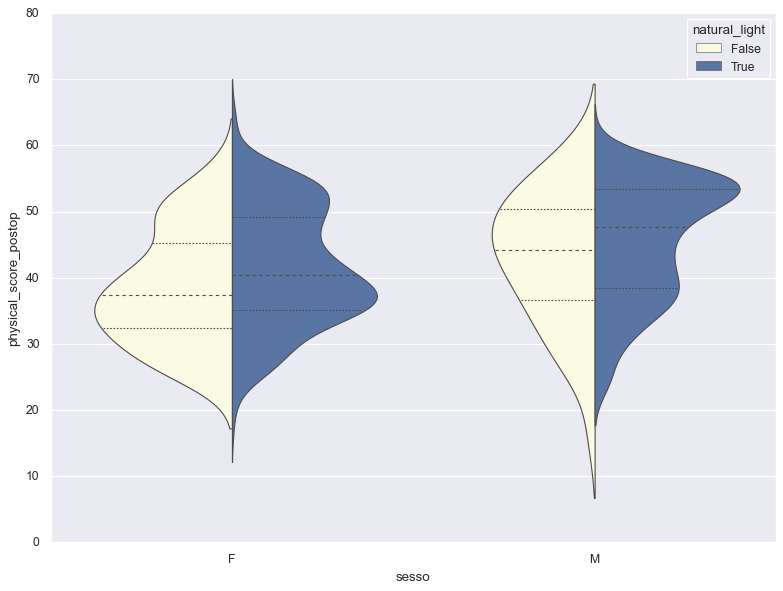

In [125]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.violinplot(data=df1, x="sesso", y="physical_score_postop", hue="natural_light",
               split=True, inner="quart", linewidth=1, palette = {False:'lightyellow', True:'b'})

<AxesSubplot:xlabel='natural_light', ylabel='physical_score_postop'>

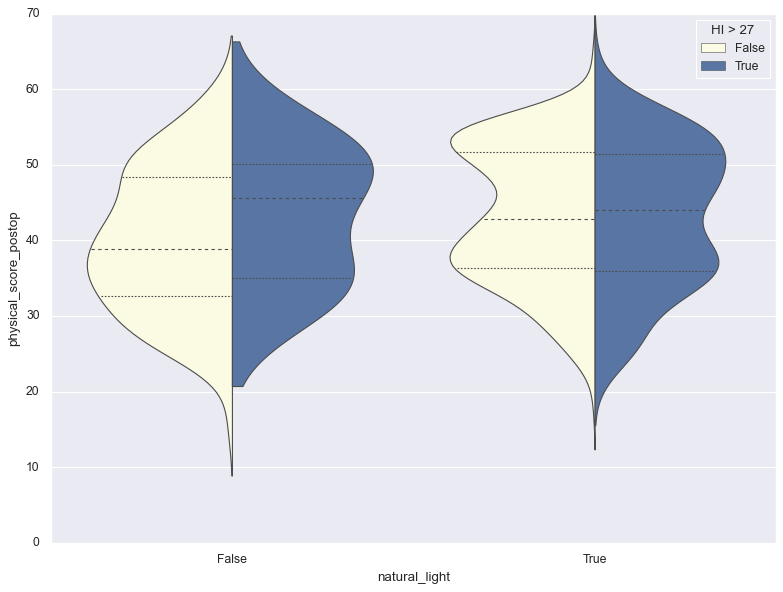

In [126]:
sns.violinplot(data=df1, x="natural_light", y="physical_score_postop", hue="HI > 27",
               split=True, inner="quart", linewidth=1, palette = {False:'lightyellow', True:'b'})

<AxesSubplot:xlabel='natural_light', ylabel='physical_score_postop'>

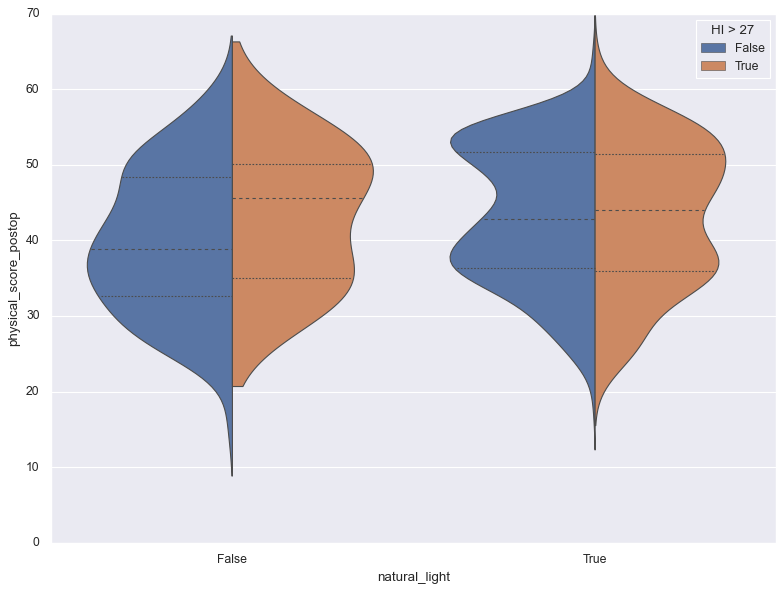

In [127]:
sns.violinplot(data=df1, x="natural_light", y="physical_score_postop", hue="HI > 27",
               split=True, inner="quart", linewidth=1)

<AxesSubplot:xlabel='HI > 27', ylabel='score_postop'>

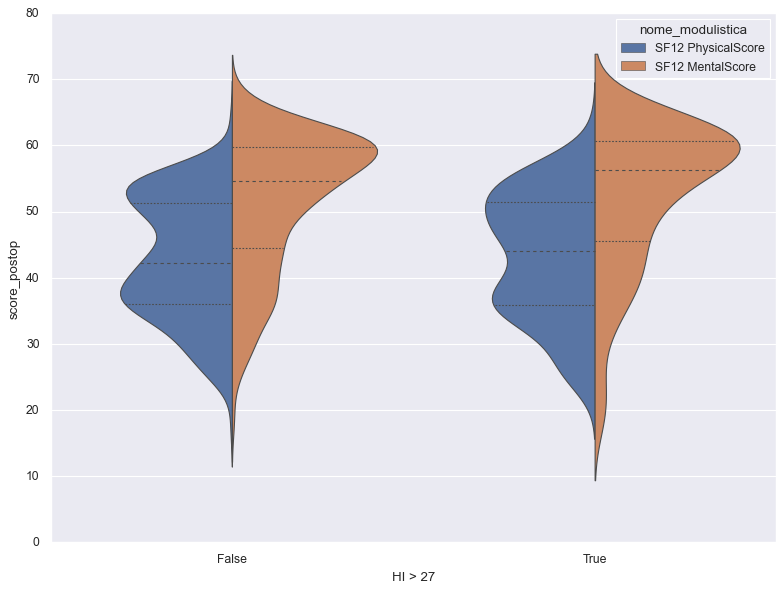

In [128]:
sns.violinplot(data=df, x="HI > 27", y="score_postop", hue="nome_modulistica",
               split=True, inner="quart", linewidth=1)

<AxesSubplot:xlabel='HI > 27', ylabel='score_preop'>

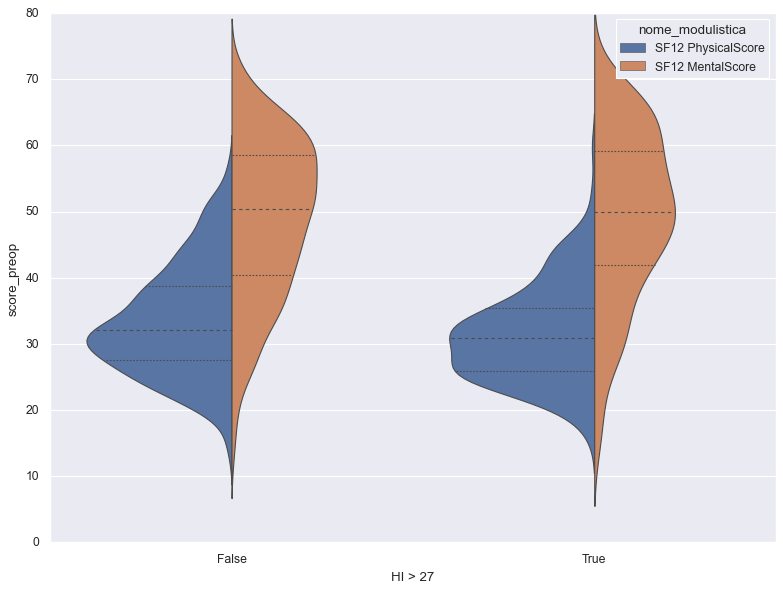

In [129]:
sns.violinplot(data=df, x="HI > 27", y="score_preop", hue="nome_modulistica",
               split=True, inner="quart", linewidth=1)

<AxesSubplot:xlabel='nome_modulistica', ylabel='score_preop'>

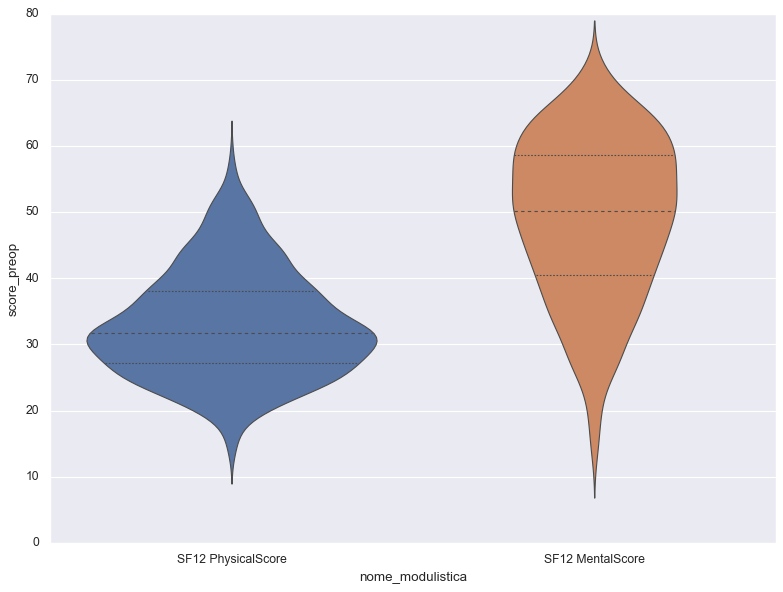

In [130]:
sns.violinplot(data=df, x="nome_modulistica", y="score_preop",
               split=True, inner="quart", linewidth=1)

<AxesSubplot:xlabel='nome_modulistica', ylabel='score_postop'>

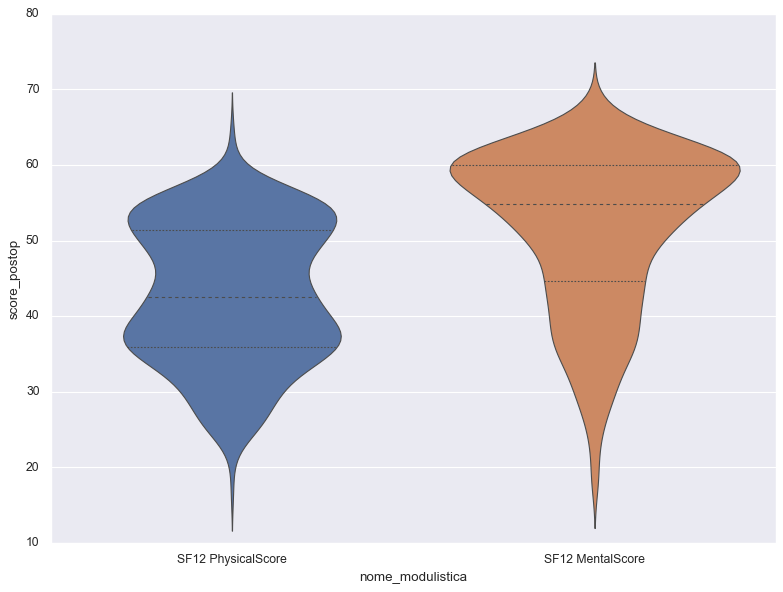

In [131]:
sns.violinplot(data=df, x="nome_modulistica", y="score_postop",
               split=True, inner="quart", linewidth=1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'poco nuvoloso'),
  Text(1, 0, 'nebbia al mattino'),
  Text(2, 0, 'sereno'),
  Text(3, 0, 'pioggia e schiarite'),
  Text(4, 0, 'pioggia debole'),
  Text(5, 0, 'nubi sparse'),
  Text(6, 0, 'temporale e schiarite'),
  Text(7, 0, 'neve'),
  Text(8, 0, 'coperto'),
  Text(9, 0, 'neve e schiarite'),
  Text(10, 0, 'neve debole'),
  Text(11, 0, 'sole e caldo'),
  Text(12, 0, 'pioggia mista a neve e schiarite'),
  Text(13, 0, 'nebbia'),
  Text(14, 0, 'pioggia')])

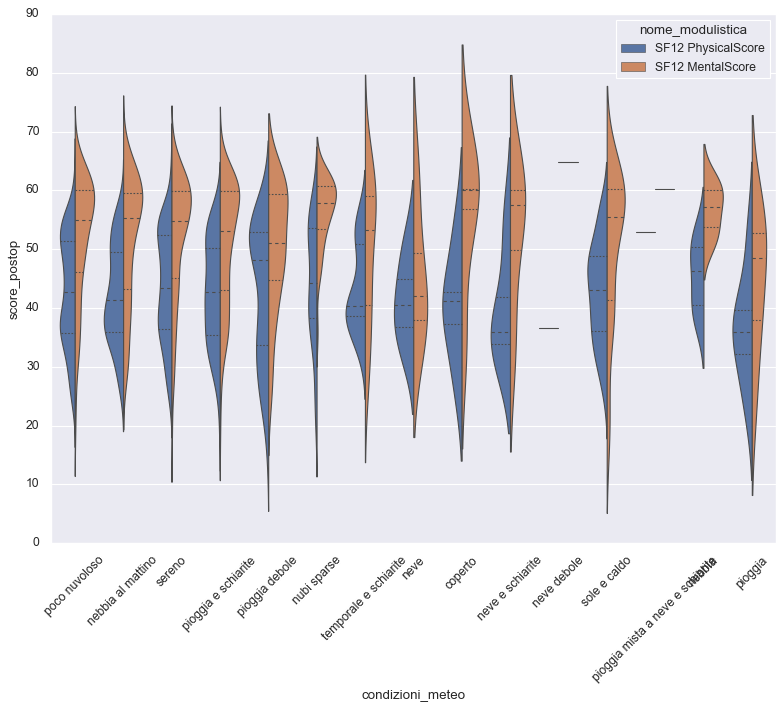

In [132]:
sns.violinplot(data=df, x="condizioni_meteo", y="score_postop", hue="nome_modulistica",
               split=True, inner="quart", linewidth=1)
plt.xticks(rotation=45)

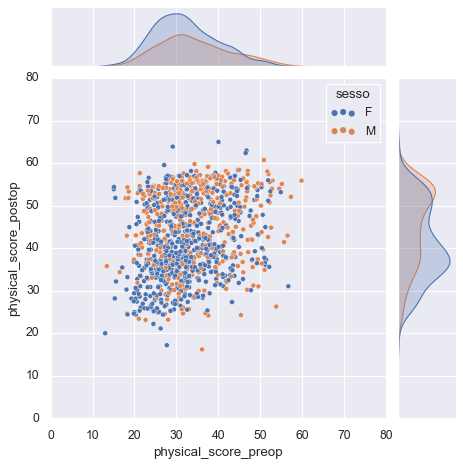

In [133]:
#physical pre/post op evidenziando il genere
#notiamo bimodalità nell genere femminile per quanto riguarda lo score post operatorio
sns.jointplot(data=df1, x="physical_score_preop", y="physical_score_postop", hue="sesso", )

In [134]:
#physical pre/post op evidenziando il genere
#notiamo bimodalità nell genere femminile per quanto riguarda lo score post operatorio
#sns.jointplot(data=df1b, x="physical_score_diff", y="mental_score_diff", hue="HI > 27")

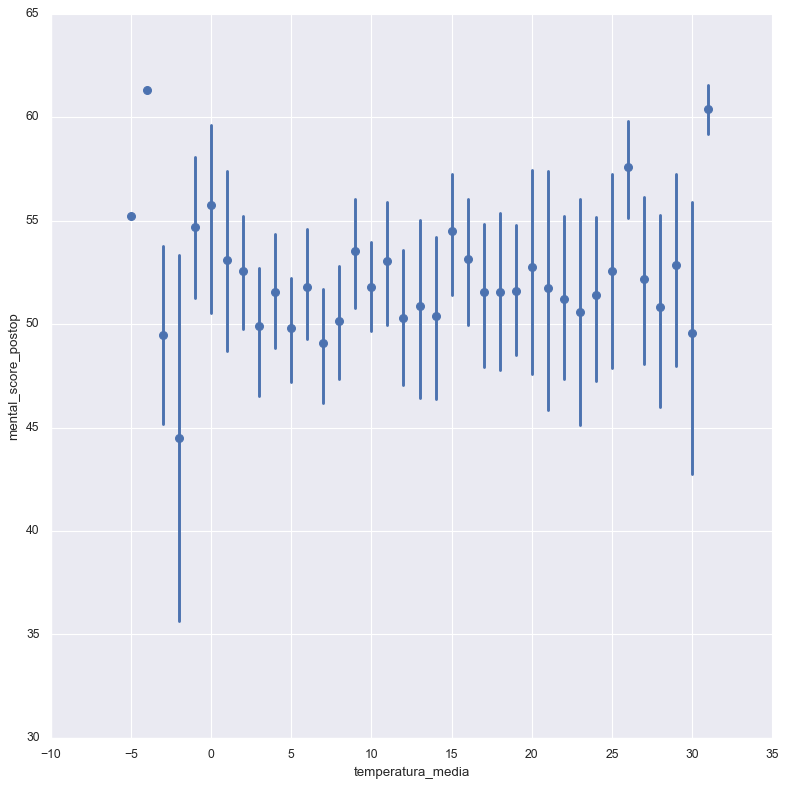

In [135]:

sns.lmplot(y = 'mental_score_postop', x = 'temperatura_media', data=df1, fit_reg=False, height=10, x_estimator=np.mean, truncate=True)

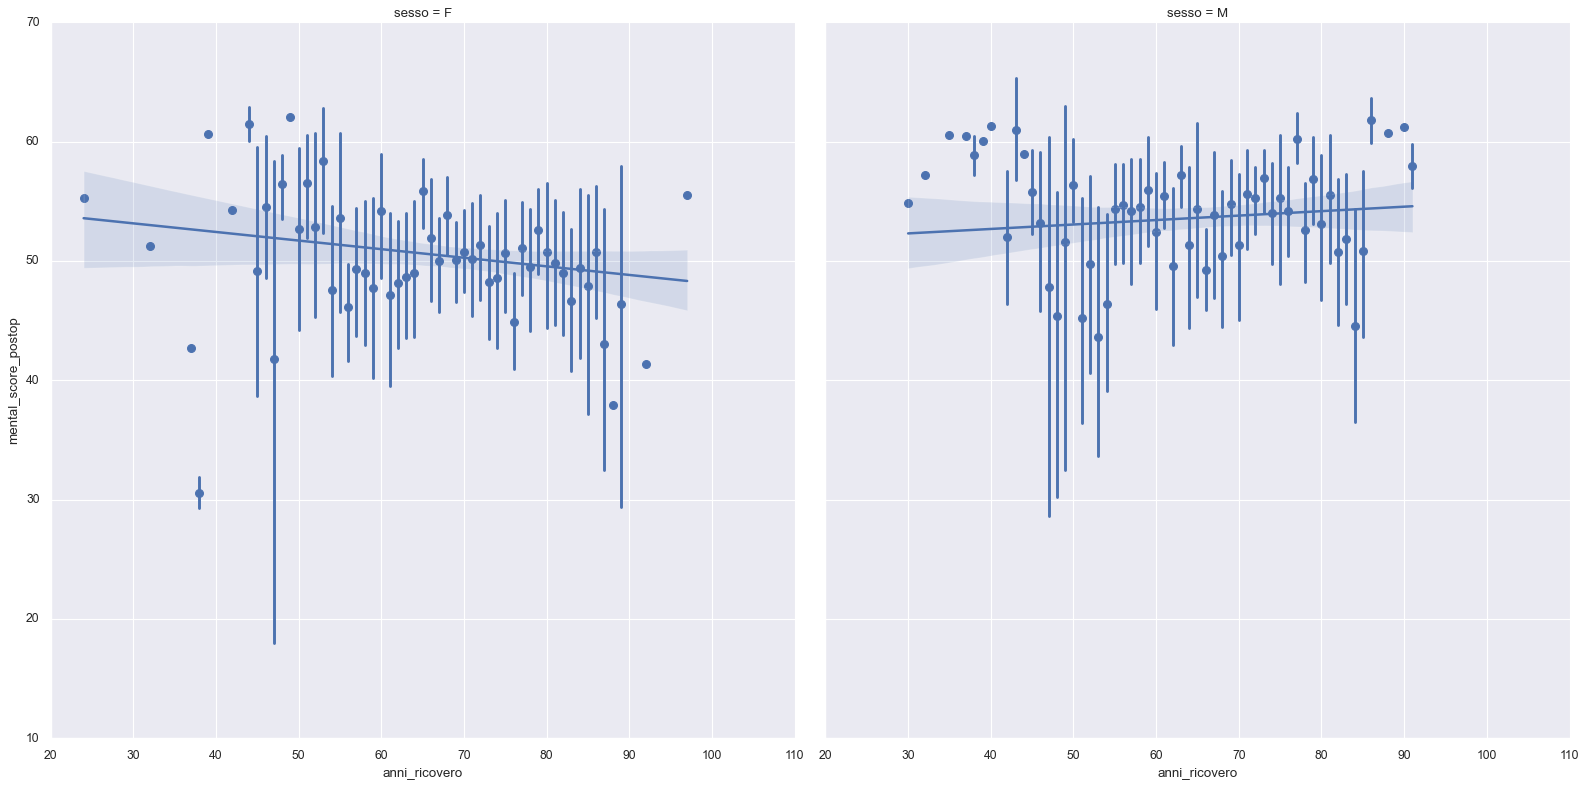

In [136]:
sns.lmplot(y = 'mental_score_postop', x = 'anni_ricovero', col = 'sesso', data=df1, fit_reg=True, height=10, x_estimator=np.mean, truncate=True)

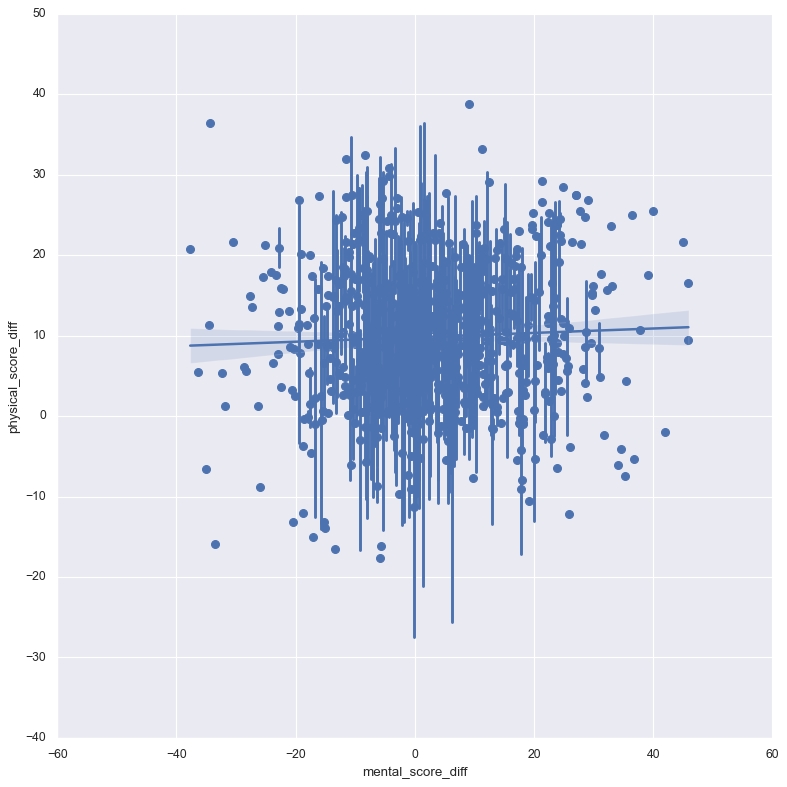

In [137]:
sns.lmplot(y = 'physical_score_diff', x = 'mental_score_diff', data=df1, fit_reg=True, height=10, x_estimator=np.mean, truncate=True)

Differenza media preop_postop di mental score (con sd), in funzione del sesso e della presenza o meno di natural_light 

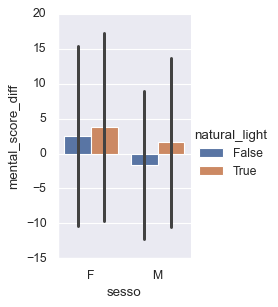

In [138]:
sns.catplot(x="sesso", y="mental_score_diff",
            hue="natural_light",
            data=df1, kind="bar", ci = 'sd',
            height=4, aspect=.7);

In [139]:
df1[(df1['HI > 27'] == True) & (df1['sesso'] == 'F') & (df1['natural_light'] == False)]['mental_score_diff'].mean()

1.7750000000000004

<AxesSubplot:xlabel='mental_score_postop', ylabel='physical_score_postop'>

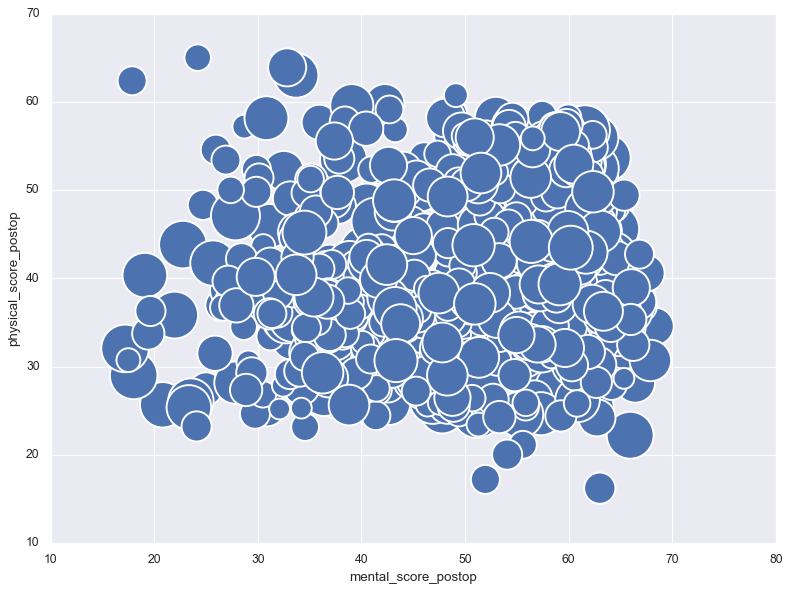

In [140]:
sns.scatterplot(data=df1, x="mental_score_postop", y="physical_score_postop", size="temperatura_media", legend=False, sizes=(20, 2000))


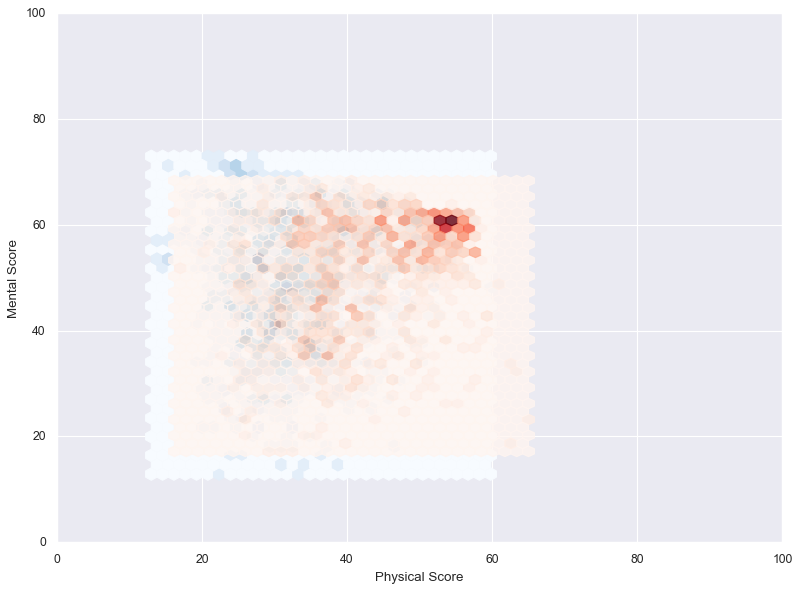

In [141]:
#plt.style.use('classic')
fig = plt.figure()
ax = plt.axes()
plt.xlim(0,100)
plt.ylim(0,100)
plt.hexbin(data=df1, x="physical_score_preop", y="mental_score_preop", gridsize=30, cmap="Blues", alpha=1)
plt.xlabel('Physical Score')
plt.ylabel('Mental Score')
plt.hexbin(data=df1, x="physical_score_postop", y="mental_score_postop", gridsize=30, cmap="Reds", alpha=0.8);

# Tentativi vari

Togliamo le osservazioni sotto i 30 e sopra i 90 anni, data la scarsa numerosità.

In [142]:
physical_score_dataset.drop(physical_score_dataset.loc[physical_score_dataset['anni_ricovero']<30].index, inplace=True)
physical_score_dataset.drop(physical_score_dataset.loc[physical_score_dataset['anni_ricovero']>90].index, inplace=True)

C:\Users\Giorgio\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [143]:
mental_score_dataset.drop(mental_score_dataset.loc[mental_score_dataset['anni_ricovero']<30].index, inplace=True)
mental_score_dataset.drop(mental_score_dataset.loc[mental_score_dataset['anni_ricovero']>90].index, inplace=True)

Divido per fasce d'età:

In [144]:
physical_score_dataset.insert(6, 'Age_group', pd.cut(physical_score_dataset['anni_ricovero'], bins = [30, 40, 50, 60, 70, 80, 90], \
              right = False, labels = ['[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90]']))

In [145]:
mental_score_dataset.insert(6, 'Age_group', pd.cut(mental_score_dataset['anni_ricovero'], bins = [30, 40, 50, 60, 70, 80, 90], \
              right = False, labels = ['[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90]']))

Droppo le condizioni meteo con numerosità inferiore a 30:

In [146]:
physical_score_dataset.groupby('condizioni_meteo').size()

condizioni_meteo
coperto                               5
nebbia                                7
nebbia al mattino                   150
neve                                  4
neve debole                           1
neve e schiarite                      4
nubi sparse                          35
pioggia                               7
pioggia debole                       46
pioggia e schiarite                 173
pioggia mista a neve e schiarite      1
poco nuvoloso                       334
sereno                              216
sole e caldo                         49
temporale e schiarite                18
dtype: int64

In [147]:
mental_score_dataset.groupby('condizioni_meteo').size()

condizioni_meteo
coperto                               5
nebbia                                7
nebbia al mattino                   150
neve                                  4
neve debole                           1
neve e schiarite                      4
nubi sparse                          35
pioggia                               7
pioggia debole                       46
pioggia e schiarite                 173
pioggia mista a neve e schiarite      1
poco nuvoloso                       334
sereno                              216
sole e caldo                         49
temporale e schiarite                18
dtype: int64

In [148]:
physical_score_dataset.drop(physical_score_dataset.loc[physical_score_dataset['condizioni_meteo']=='coperto'].index, inplace=True)
physical_score_dataset.drop(physical_score_dataset.loc[physical_score_dataset['condizioni_meteo']=='nebbia'].index, inplace=True)
physical_score_dataset.drop(physical_score_dataset.loc[physical_score_dataset['condizioni_meteo']=='neve'].index, inplace=True)
physical_score_dataset.drop(physical_score_dataset.loc[physical_score_dataset['condizioni_meteo']=='neve debole'].index, inplace=True)
physical_score_dataset.drop(physical_score_dataset.loc[physical_score_dataset['condizioni_meteo']=='neve e schiarite'].index, inplace=True)
physical_score_dataset.drop(physical_score_dataset.loc[physical_score_dataset['condizioni_meteo']=='pioggia'].index, inplace=True)
physical_score_dataset.drop(physical_score_dataset.loc[physical_score_dataset['condizioni_meteo']=='pioggia mista a neve e schiarite'].index, inplace=True)
physical_score_dataset.drop(physical_score_dataset.loc[physical_score_dataset['condizioni_meteo']=='temporale e schiarite'].index, inplace=True)

In [149]:
mental_score_dataset.drop(mental_score_dataset.loc[mental_score_dataset['condizioni_meteo']=='coperto'].index, inplace=True)
mental_score_dataset.drop(mental_score_dataset.loc[mental_score_dataset['condizioni_meteo']=='nebbia'].index, inplace=True)
mental_score_dataset.drop(mental_score_dataset.loc[mental_score_dataset['condizioni_meteo']=='neve'].index, inplace=True)
mental_score_dataset.drop(mental_score_dataset.loc[mental_score_dataset['condizioni_meteo']=='neve debole'].index, inplace=True)
mental_score_dataset.drop(mental_score_dataset.loc[mental_score_dataset['condizioni_meteo']=='neve e schiarite'].index, inplace=True)
mental_score_dataset.drop(mental_score_dataset.loc[mental_score_dataset['condizioni_meteo']=='pioggia'].index, inplace=True)
mental_score_dataset.drop(mental_score_dataset.loc[mental_score_dataset['condizioni_meteo']=='pioggia mista a neve e schiarite'].index, inplace=True)
mental_score_dataset.drop(mental_score_dataset.loc[mental_score_dataset['condizioni_meteo']=='temporale e schiarite'].index, inplace=True)

In [150]:
#temp3 = physical_score_dataset[['score_postop', 'condizioni_meteo']] #, 'HI > 27', 'temperatura_media', 'umidita_media']]
temp3 = physical_score_dataset[['score_postop', 'condizioni_meteo', 'HI > 27', 'temperatura_media', 'umidita_media']]
temp3.head()

,score_postop,condizioni_meteo,HI > 27,temperatura_media,umidita_media
0,37.40,poco nuvoloso,False,20.0,69.0
2,38.25,poco nuvoloso,False,18.0,65.0
4,55.67,poco nuvoloso,False,23.0,74.0
6,57.08,poco nuvoloso,False,15.0,72.0
8,29.13,nebbia al mattino,False,18.0,75.0


In [151]:
temp4 = mental_score_dataset[['score_postop', 'condizioni_meteo', 'HI > 27', 'temperatura_media', 'umidita_media']]
temp4.head()

,score_postop,condizioni_meteo,HI > 27,temperatura_media,umidita_media
1,58.46,poco nuvoloso,False,20.0,69.0
3,64.62,poco nuvoloso,False,18.0,65.0
5,58.47,poco nuvoloso,False,23.0,74.0
7,54.97,poco nuvoloso,False,15.0,72.0
9,55.74,nebbia al mattino,False,18.0,75.0


In [152]:
temp3.groupby(['condizioni_meteo']).mean()

,score_postop,HI > 27,temperatura_media,umidita_media
condizioni_meteo,,,,
nebbia al mattino,42.214667,0.020000,6.753333,81.953333
nubi sparse,44.449143,0.028571,10.457143,77.828571
pioggia debole,42.719348,0.000000,7.500000,93.369565
pioggia e schiarite,42.705780,0.000000,10.092486,85.514451
poco nuvoloso,42.830808,0.326347,16.000000,66.446108
sereno,43.632685,0.087963,11.291667,59.106481
sole e caldo,42.714286,1.000000,27.122449,58.469388


In [153]:
temp4.groupby(['condizioni_meteo']).mean()

,score_postop,HI > 27,temperatura_media,umidita_media
condizioni_meteo,,,,
nebbia al mattino,51.498400,0.020000,6.753333,81.953333
nubi sparse,56.215143,0.028571,10.457143,77.828571
pioggia debole,49.976957,0.000000,7.500000,93.369565
pioggia e schiarite,50.777630,0.000000,10.092486,85.514451
poco nuvoloso,51.944491,0.326347,16.000000,66.446108
sereno,51.922824,0.087963,11.291667,59.106481
sole e caldo,50.254286,1.000000,27.122449,58.469388


Joyplot:

(<Figure size 936x661.6 with 8 Axes>,
 [<AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:title={'center':'Prova'}>])

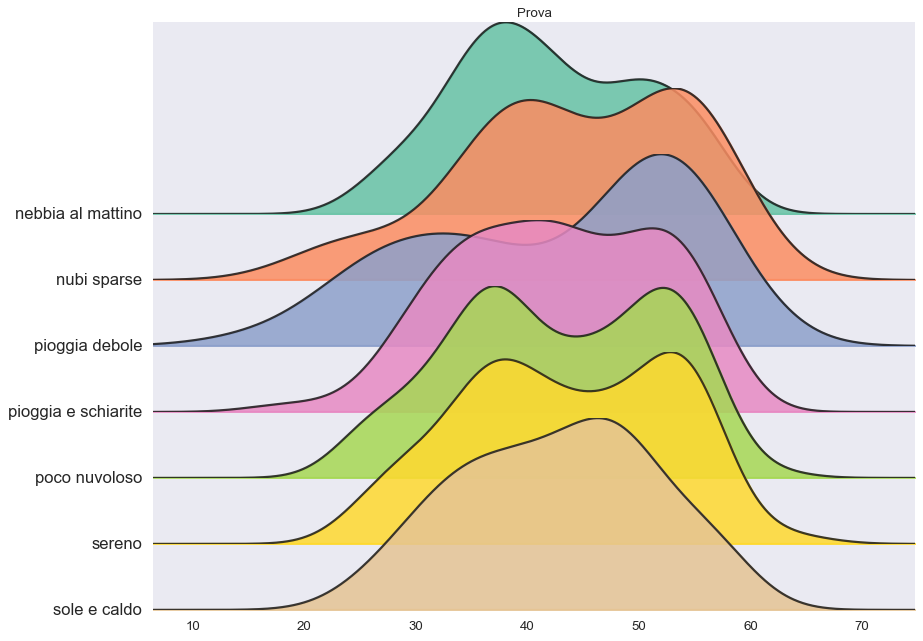

In [154]:
!pip install joypy
import joypy

joypy.joyplot(temp3[['score_postop', 'condizioni_meteo']], by='condizioni_meteo', ylim='own', figsize=(11.7, 8.27),
                          title=f"Prova",  
                          ylabelsize=15, tails=0.2, linewidth=2, overlap=2, alpha=0.85, 
                          grid='y', xlim=[0, 100], colormap=plm.cm.Set2)

(<Figure size 936x661.6 with 8 Axes>,
 [<AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:title={'center':'Prova'}>])

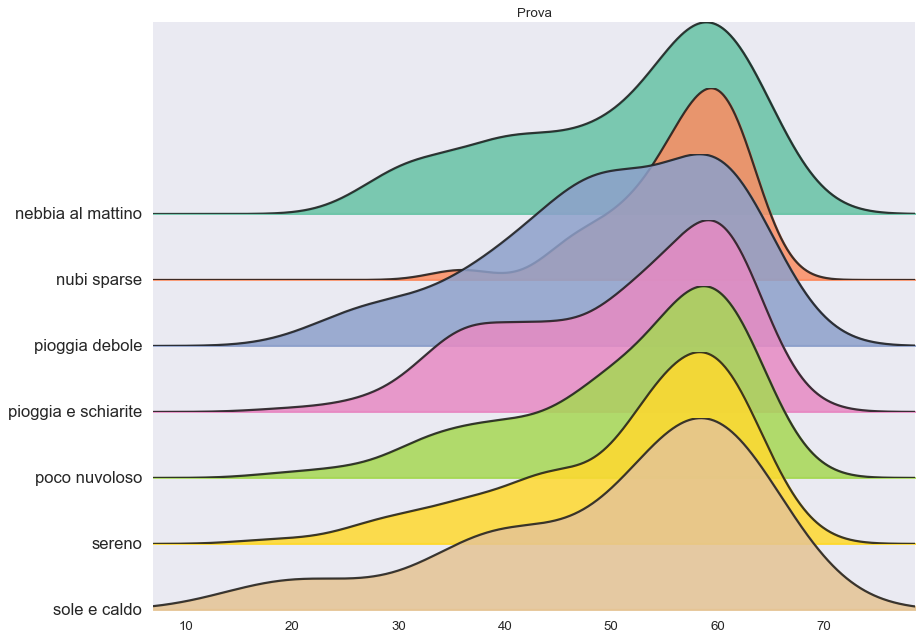

In [155]:
#!pip install joypy
#import joypy

joypy.joyplot(temp4[['score_postop', 'condizioni_meteo']], by='condizioni_meteo', ylim='own', figsize=(11.7, 8.27),
                          title=f"Prova",  
                          ylabelsize=15, tails=0.2, linewidth=2, overlap=2, alpha=0.85, 
                          grid='y', xlim=[0, 100], colormap=plm.cm.Set2)

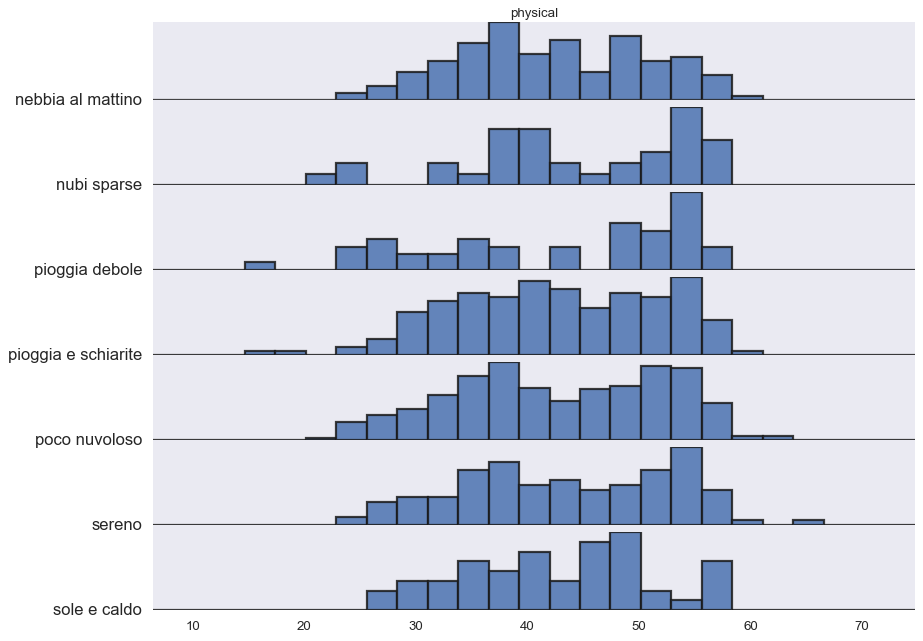

In [156]:
#!pip install joypy
#import joypy
fig, axes = joypy.joyplot(temp3[['score_postop', 'condizioni_meteo']], by='condizioni_meteo', ylim='own', figsize=(11.7, 8.27),
                          title=f"physical",  
                          ylabelsize=15, tails=0.2, linewidth=2, overlap=0, alpha=0.85, hist = True, bins = 25,
                          grid='y', xlim=[0, 100], colormap=plm.cm.Set2)

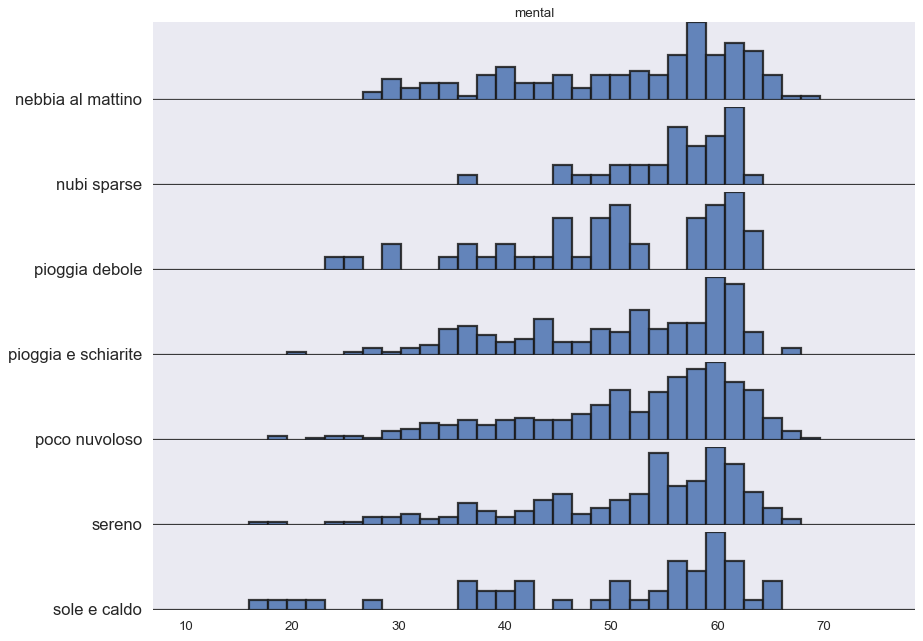

In [157]:
#!pip install joypy
#import joypy
fig, axes = joypy.joyplot(temp4[['score_postop', 'condizioni_meteo']], by='condizioni_meteo', ylim='own', figsize=(11.7, 8.27),
                          title=f"mental",  
                          ylabelsize=15, tails=0.2, linewidth=2, overlap=0, alpha=0.85, hist = True, bins = 40,
                          grid='y', xlim=[0, 100], colormap=plm.cm.Set2)

Tutto il procedimento per l'heatmap:

In [158]:
temp = physical_score_dataset.groupby(['condizioni_meteo', 'Age_group'], as_index=False)['score_postop'].mean()

In [159]:
temp = temp.pivot(index='condizioni_meteo', columns='Age_group', values='score_postop')
temp

Age_group,[30-40),[40-50),[50-60),[60-70),[70-80),[80-90]
condizioni_meteo,,,,,,
nebbia al mattino,32.400000,40.656000,43.463043,43.765745,41.827963,38.764737
nubi sparse,NaN,40.265000,43.808000,48.836667,41.171538,44.960000
pioggia debole,54.580000,34.820000,32.832500,47.216154,44.088696,27.230000
pioggia e schiarite,44.965000,41.035000,41.682308,43.293571,43.131481,41.657407
poco nuvoloso,42.903333,44.247778,42.883208,43.080816,42.559238,42.373333
sereno,NaN,46.584444,45.420000,43.293333,44.012530,39.083478
sole e caldo,NaN,31.430000,43.234286,42.163333,44.120000,43.126250


<AxesSubplot:xlabel='Age_group', ylabel='condizioni_meteo'>

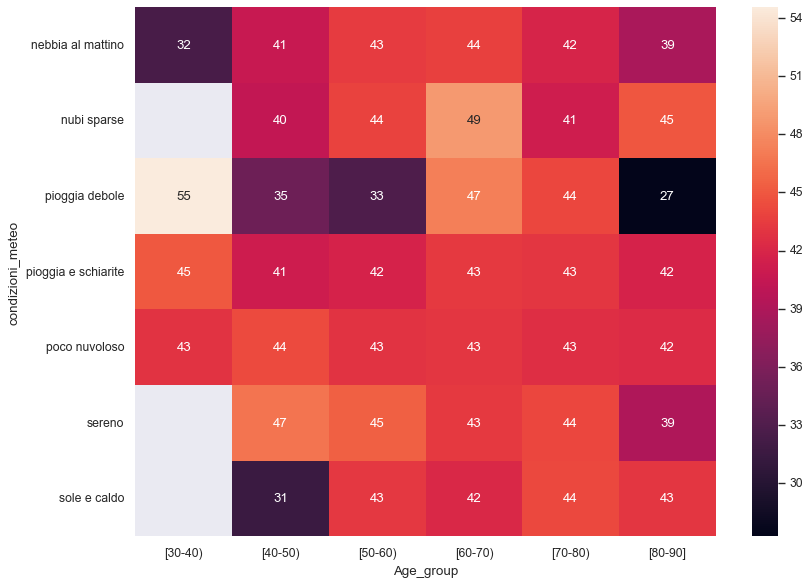

In [160]:
sns.heatmap(temp, annot=True)

 ## Altri tentativi

### Parallel coordinates

In [161]:
means = physical_score_dataset.groupby('condizioni_meteo', as_index=False)['score_preop', 'score_postop'].mean()
means.head()

C:\Users\Giorgio\AppData\Local\Temp/ipykernel_1120/4084499539.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  means = physical_score_dataset.groupby('condizioni_meteo', as_index=False)['score_preop', 'score_postop'].mean()


,condizioni_meteo,score_preop,score_postop
0,nebbia al mattino,32.956000,42.214667
1,nubi sparse,34.612000,44.449143
2,pioggia debole,34.619348,42.719348
3,pioggia e schiarite,33.316763,42.705780
4,poco nuvoloso,32.518533,42.830808


<AxesSubplot:>

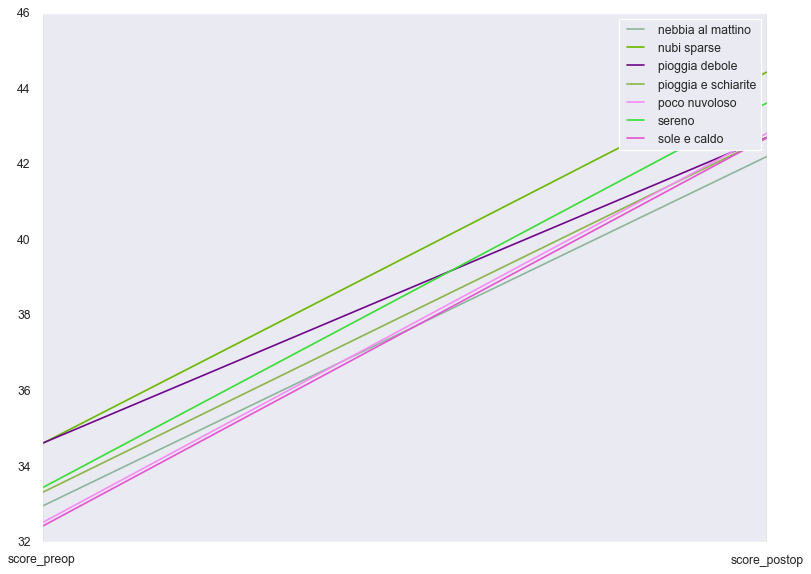

In [162]:
pd.plotting.parallel_coordinates(means, 'condizioni_meteo')

In [163]:
mental_means = mental_score_dataset.groupby('condizioni_meteo', as_index=False)['score_preop', 'score_postop'].mean()
mental_means.head()

C:\Users\Giorgio\AppData\Local\Temp/ipykernel_1120/1554224973.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mental_means = mental_score_dataset.groupby('condizioni_meteo', as_index=False)['score_preop', 'score_postop'].mean()


,condizioni_meteo,score_preop,score_postop
0,nebbia al mattino,48.785067,51.498400
1,nubi sparse,50.683714,56.215143
2,pioggia debole,48.070435,49.976957
3,pioggia e schiarite,47.671272,50.777630
4,poco nuvoloso,49.366347,51.944491


<AxesSubplot:>

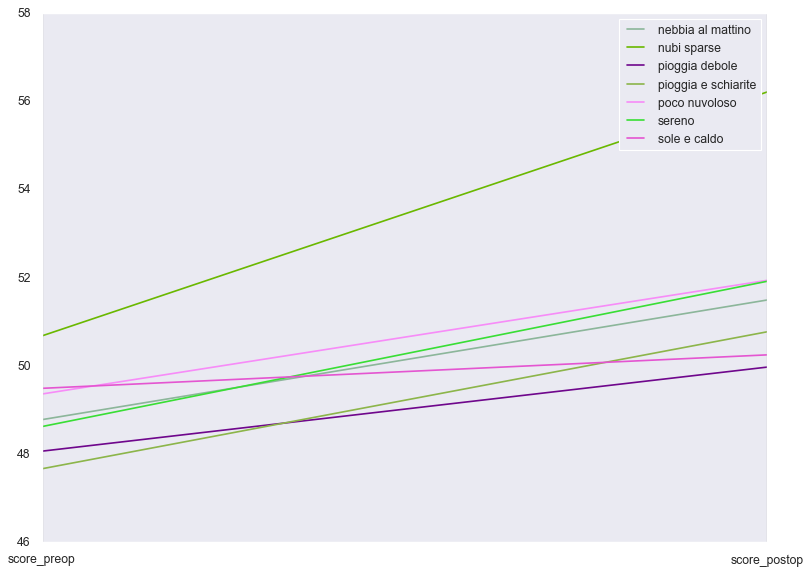

In [164]:
pd.plotting.parallel_coordinates(mental_means, 'condizioni_meteo')

Potrebbe avere senso mostrare questo? Ovviamente andrebbe sistemata la scala colore, si potrebbe pensare di mettere una banda per ciascuna riga che mostri la deviazione standard e magari anche, se è possibile, modificare lo spessore delle righe a seconda della numerosità dei gruppi.

# Tentativo percentuali

## Natural light

In [165]:
df1.head()

,physical_score_preop,physical_score_postop,physical_score_diff,mental_score_preop,mental_score_postop,mental_score_diff,physical_mental_diff_postop,physical_mental_diff_preop,condizioni_meteo,sesso,anni_ricovero,temperatura_media,umidita_media,HI > 27,natural_light
0,27.60,37.40,9.8,54.36,58.46,4.1,-21.06,-26.76,poco nuvoloso,F,70,20.0,69.0,False,True
1,28.15,38.25,10.1,57.02,64.62,7.6,-26.37,-28.87,poco nuvoloso,M,69,18.0,65.0,False,True
2,31.57,55.67,24.1,60.27,58.47,-1.8,-2.80,-28.70,poco nuvoloso,M,70,23.0,74.0,False,True
3,34.28,57.08,22.8,50.17,54.97,4.8,2.11,-15.89,poco nuvoloso,F,66,15.0,72.0,False,True
4,27.43,29.13,1.7,54.14,55.74,1.6,-26.61,-26.71,nebbia al mattino,F,73,18.0,75.0,False,True


In [166]:
df1.groupby('natural_light').size()

natural_light
False    121
True     934
dtype: int64

In [167]:
df1['physical_score_postop'].mean()

42.862360189573465

In [168]:
df1['mental_score_postop'].mean()

51.63102369668237

In [169]:
def f_above_physical(row):
    if row['physical_score_postop'] >= 42.86:
        return 1
    elif row['physical_score_postop'] < 42.86:
        return 0
    
def f_above_mental(row):
    if row['mental_score_postop'] >= 51.63:
        return 1
    elif row['mental_score_postop'] < 51.63:
        return 0

In [170]:
df1['above_physical'] = df1.apply(f_above_physical, axis = 1)
df1['above_mental'] = df1.apply(f_above_mental, axis = 1)
df1.head()

,physical_score_preop,physical_score_postop,physical_score_diff,mental_score_preop,mental_score_postop,mental_score_diff,physical_mental_diff_postop,physical_mental_diff_preop,condizioni_meteo,sesso,anni_ricovero,temperatura_media,umidita_media,HI > 27,natural_light,above_physical,above_mental
0,27.60,37.40,9.8,54.36,58.46,4.1,-21.06,-26.76,poco nuvoloso,F,70,20.0,69.0,False,True,0,1
1,28.15,38.25,10.1,57.02,64.62,7.6,-26.37,-28.87,poco nuvoloso,M,69,18.0,65.0,False,True,0,1
2,31.57,55.67,24.1,60.27,58.47,-1.8,-2.80,-28.70,poco nuvoloso,M,70,23.0,74.0,False,True,1,1
3,34.28,57.08,22.8,50.17,54.97,4.8,2.11,-15.89,poco nuvoloso,F,66,15.0,72.0,False,True,1,1
4,27.43,29.13,1.7,54.14,55.74,1.6,-26.61,-26.71,nebbia al mattino,F,73,18.0,75.0,False,True,0,1


In [171]:
df1.groupby(['natural_light', 'above_physical', 'above_mental']).size()

natural_light  above_physical  above_mental
False          0               0                42
                               1                32
               1               0                15
                               1                32
True           0               0               261
                               1               200
               1               0               104
                               1               369
dtype: int64

Proporzioni:

Natural_light = False:

quadrante in basso a sinistra (0,0) = 42/121 = 0,347

quadrante in alto a sinistra (0,1) = 32/121 = 0,264

quadrante in basso a destra (1,0) = 15/121 = 0,124

quadrante in alto a destra (1,1) = 32/121 = 0,264

Natural_light = True:

quadrante in basso a sinistra (0,0) = 261/924 = 0,282

quadrante in alto a sinistra (0,1) = 200/924 = 0,216

quadrante in basso a destra (1,0) = 104/924 = 0,113

quadrante in alto a destra (1,1) = 369/924 = 0,399

Per natural_light = True c'è una maggior percentuale di osservazioni in alto a destra (score sia fisico che mentale sopra la media). La luce spinge a dare dei voti più alti?

## HI > 27

In [172]:
df1.groupby('HI > 27').size()

HI > 27
False    864
True     191
dtype: int64

In [173]:
df1.groupby(['HI > 27', 'above_physical', 'above_mental']).size()

HI > 27  above_physical  above_mental
False    0               0               252
                         1               193
         1               0                98
                         1               321
True     0               0                51
                         1                39
         1               0                21
                         1                80
dtype: int64

Proporzioni:

HI > 27 = False:

quadrante in basso a sinistra (0,0) = 252/864 = 0,292

quadrante in alto a sinistra (0,1) = 193/864 = 0,223

quadrante in basso a destra (1,0) = 98/864 = 0,113

quadrante in alto a destra (1,1) = 321/864 = 0,371

HI < 27 = True:

quadrante in basso a sinistra (0,0) = 51/191 = 0,267

quadrante in alto a sinistra (0,1) = 39/191 = 0,204

quadrante in basso a destra (1,0) = 21/191 = 0,110

quadrante in alto a destra (1,1) = 80/191 = 0,419

Qua non mi sembra ci sia una grande differenza invece.

## Aggiunta colonna physical_mental_diff


# Ennesimo tentativo

In [174]:
def weather_cond(row):
    if row['condizioni_meteo'] in ['sereno', 'sole e caldo']:
        return 'bel tempo'
    if row['condizioni_meteo'] in ['poco nuvoloso', 'nubi sparse', 'coperto']:
        return 'nuvoloso'
    if row['condizioni_meteo'] in ['neve', 'neve debole']:
        return 'neve'
    if row['condizioni_meteo'] in ['pioggia e schiarite', 'temporale e schiarite', 'neve e schiarite',
                                    'pioggia mista a neve e schiarite']:
        return 'precipitazioni e schiarite'
    if row['condizioni_meteo'] in ['nebbia al mattino', 'nebbia']:
        return 'nebbia'
    if row['condizioni_meteo'] in ['pioggia', 'pioggia debole']:
        return 'pioggia'

In [175]:
df1['weather_category'] = df1.apply(weather_cond, axis = 1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'sole e caldo'),
  Text(1, 0, 'sereno'),
  Text(2, 0, 'poco nuvoloso'),
  Text(3, 0, 'nubi sparse'),
  Text(4, 0, 'coperto'),
  Text(5, 0, 'nebbia al mattino'),
  Text(6, 0, 'nebbia'),
  Text(7, 0, 'pioggia e schiarite'),
  Text(8, 0, 'temporale e schiarite'),
  Text(9, 0, 'pioggia mista a neve e schiarite'),
  Text(10, 0, 'neve e schiarite'),
  Text(11, 0, 'pioggia debole'),
  Text(12, 0, 'pioggia'),
  Text(13, 0, 'neve debole'),
  Text(14, 0, 'neve')])

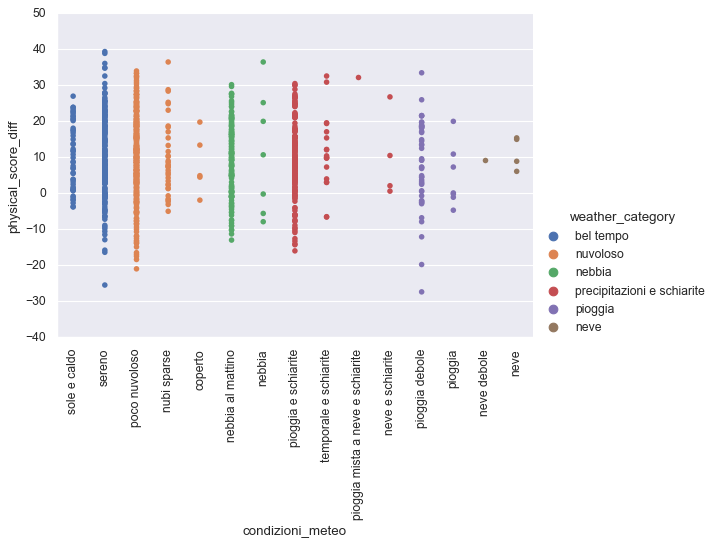

In [176]:
sns.catplot(x = 'condizioni_meteo', y = 'physical_score_diff', hue = 'weather_category', data = df1,
           order=['sole e caldo', 'sereno', 'poco nuvoloso', 'nubi sparse', 'coperto', 'nebbia al mattino', 'nebbia',
                      'pioggia e schiarite','temporale e schiarite', 'pioggia mista a neve e schiarite', 'neve e schiarite', 
                      'pioggia debole', 'pioggia', 'neve debole', 'neve'], hue_order = ['bel tempo', 'nuvoloso', 'nebbia',
                      'precipitazioni e schiarite', 'pioggia', 'neve'], jitter = False, aspect = 11.7/8.27)
plt.xticks(rotation=90)

La neve ha solo score positivi! Sono pochissime osservazioni, ma c'è possibilità di dare del context per quelle osservazioni. Bene o male la maggior parte delle osservazioni portano a un miglioramento dello score: ovviamente in parte questo è dovuto alla buona riuscita dell'intervento però a quel punto potremmo concentrarci sui punti "estremi". La maggior parte dei punti con differenza maggiore di +30 è in corrispondenza di tempo sereno o poco nuvoloso, vorrà pur dire qualcosa no? Mentre fra i punti estremi in negativo abbiamo due punti in pioggia debole. Onestamente questa, tra tutte, è la visualizzazione in cui riesco a leggerci qualcosa (non molto, ma rispetto alle altre...). Si può sicuramente migliorare, soprattutto a livello di impatto visivo. 

Proviamo con uno `stripplot`

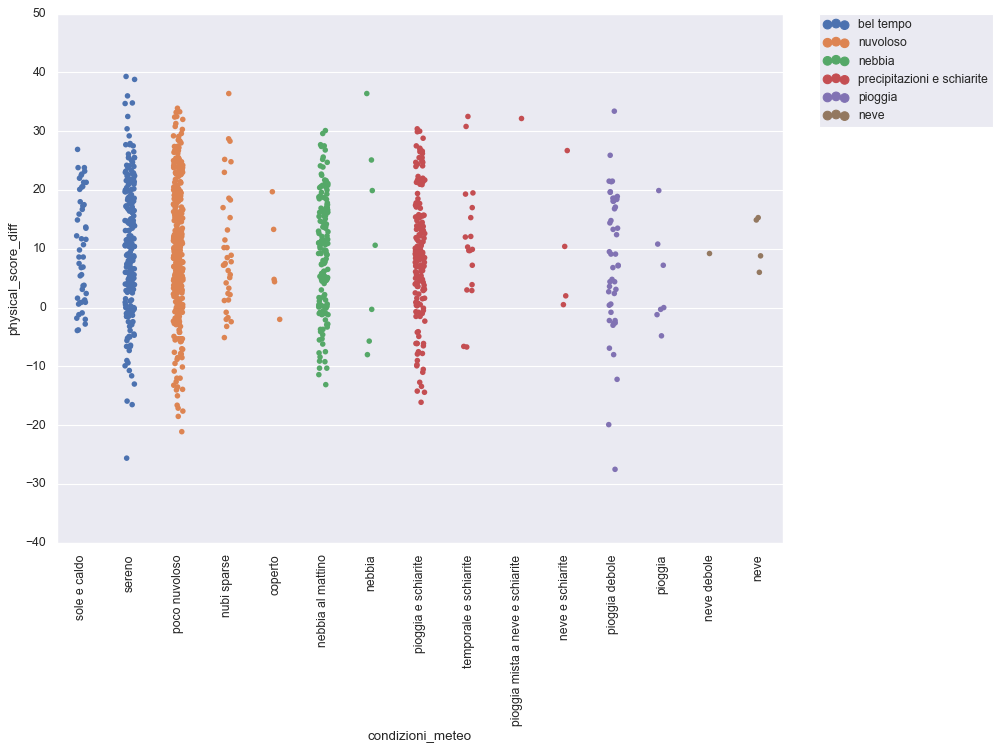

In [177]:
physical_diff = sns.stripplot(x = 'condizioni_meteo', y = 'physical_score_diff', hue = 'weather_category', data = df1,
                       order=['sole e caldo', 'sereno', 'poco nuvoloso', 'nubi sparse', 'coperto', 'nebbia al mattino', 'nebbia',
                      'pioggia e schiarite','temporale e schiarite', 'pioggia mista a neve e schiarite', 'neve e schiarite', 
                      'pioggia debole', 'pioggia', 'neve debole', 'neve'], hue_order = ['bel tempo', 'nuvoloso', 'nebbia',
                      'precipitazioni e schiarite', 'pioggia', 'neve'], jitter = True)
physical_diff.set_xticklabels(physical_diff.get_xticklabels(), rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Penso possa migliorare la visualizzazione una riduzione delle classi alle sole `weather_category` e la sovrapposizione dello `stripplot` ad un boxplot

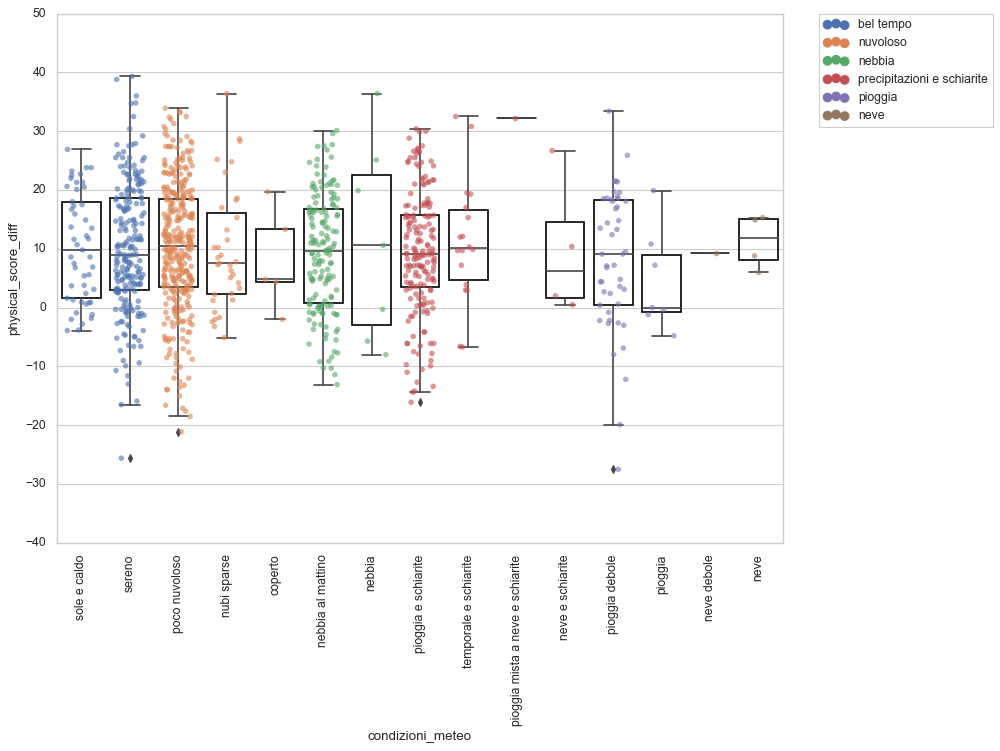

In [231]:
sns.set_style("whitegrid")
PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'black'},
}
sns.boxplot(x = 'condizioni_meteo', y = 'physical_score_diff', data = df1, \
           order=['sole e caldo', 'sereno', 'poco nuvoloso', 'nubi sparse', 'coperto', 'nebbia al mattino', 'nebbia',
           'pioggia e schiarite','temporale e schiarite', 'pioggia mista a neve e schiarite', 'neve e schiarite', \
           'pioggia debole', 'pioggia', 'neve debole', 'neve'], **PROPS)
physical_diff = sns.stripplot(x = 'condizioni_meteo', y = 'physical_score_diff', hue = 'weather_category', data = df1,
                       order=['sole e caldo', 'sereno', 'poco nuvoloso', 'nubi sparse', 'coperto', 'nebbia al mattino', 'nebbia',
                      'pioggia e schiarite','temporale e schiarite', 'pioggia mista a neve e schiarite', 'neve e schiarite', 
                      'pioggia debole', 'pioggia', 'neve debole', 'neve'], hue_order = ['bel tempo', 'nuvoloso', 'nebbia',
                      'precipitazioni e schiarite', 'pioggia', 'neve'], jitter = 0.3, alpha = 0.6)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'sole e caldo'),
  Text(1, 0, 'sereno'),
  Text(2, 0, 'poco nuvoloso'),
  Text(3, 0, 'nubi sparse'),
  Text(4, 0, 'coperto'),
  Text(5, 0, 'nebbia al mattino'),
  Text(6, 0, 'nebbia'),
  Text(7, 0, 'pioggia e schiarite'),
  Text(8, 0, 'temporale e schiarite'),
  Text(9, 0, 'pioggia mista a neve e schiarite'),
  Text(10, 0, 'neve e schiarite'),
  Text(11, 0, 'pioggia debole'),
  Text(12, 0, 'pioggia'),
  Text(13, 0, 'neve debole'),
  Text(14, 0, 'neve')])

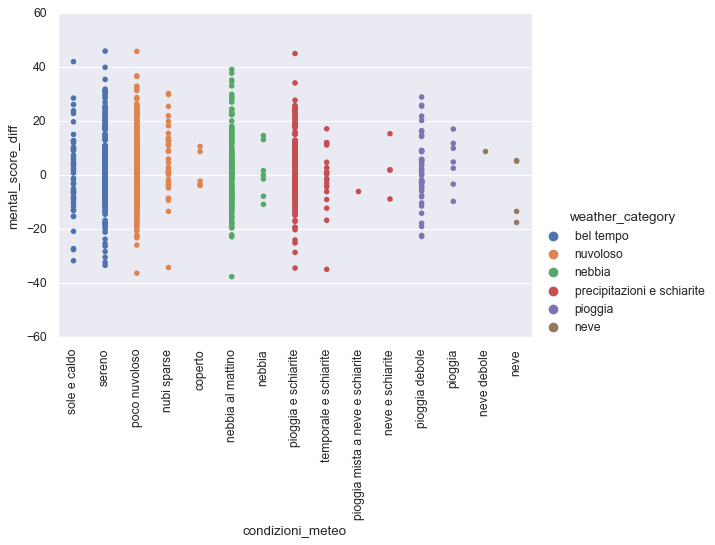

In [178]:
sns.catplot(x = 'condizioni_meteo', y = 'mental_score_diff', hue = 'weather_category', data = df1,
           order=['sole e caldo', 'sereno', 'poco nuvoloso', 'nubi sparse', 'coperto', 'nebbia al mattino', 'nebbia',
                      'pioggia e schiarite','temporale e schiarite', 'pioggia mista a neve e schiarite', 'neve e schiarite', 
                      'pioggia debole', 'pioggia', 'neve debole', 'neve'], hue_order = ['bel tempo', 'nuvoloso', 'nebbia',
                      'precipitazioni e schiarite', 'pioggia', 'neve'], jitter = False, aspect = 11.7/8.27)
plt.xticks(rotation=90)

Provo a fare la stessa cosa ma sulla differenza physical_mental

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'sole e caldo'),
  Text(1, 0, 'sereno'),
  Text(2, 0, 'poco nuvoloso'),
  Text(3, 0, 'nubi sparse'),
  Text(4, 0, 'coperto'),
  Text(5, 0, 'nebbia al mattino'),
  Text(6, 0, 'nebbia'),
  Text(7, 0, 'pioggia e schiarite'),
  Text(8, 0, 'temporale e schiarite'),
  Text(9, 0, 'pioggia mista a neve e schiarite'),
  Text(10, 0, 'neve e schiarite'),
  Text(11, 0, 'pioggia debole'),
  Text(12, 0, 'pioggia'),
  Text(13, 0, 'neve debole'),
  Text(14, 0, 'neve')])

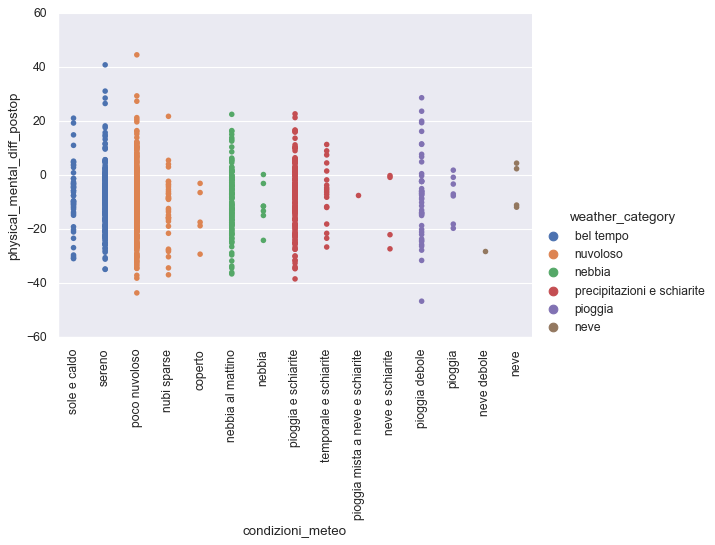

In [179]:
sns.catplot(x = 'condizioni_meteo', y = 'physical_mental_diff_postop', hue = 'weather_category', data = df1,
           order=['sole e caldo', 'sereno', 'poco nuvoloso', 'nubi sparse', 'coperto', 'nebbia al mattino', 'nebbia',
                      'pioggia e schiarite','temporale e schiarite', 'pioggia mista a neve e schiarite', 'neve e schiarite', 
                      'pioggia debole', 'pioggia', 'neve debole', 'neve'], hue_order = ['bel tempo', 'nuvoloso', 'nebbia',
                      'precipitazioni e schiarite', 'pioggia', 'neve'], jitter = False, aspect = 11.7/8.27)
plt.xticks(rotation=90)

## Cleveland Dotplot

In [180]:
df1.head()

,physical_score_preop,physical_score_postop,physical_score_diff,mental_score_preop,mental_score_postop,mental_score_diff,physical_mental_diff_postop,physical_mental_diff_preop,condizioni_meteo,sesso,anni_ricovero,temperatura_media,umidita_media,HI > 27,natural_light,above_physical,above_mental,weather_category
0,27.60,37.40,9.8,54.36,58.46,4.1,-21.06,-26.76,poco nuvoloso,F,70,20.0,69.0,False,True,0,1,nuvoloso
1,28.15,38.25,10.1,57.02,64.62,7.6,-26.37,-28.87,poco nuvoloso,M,69,18.0,65.0,False,True,0,1,nuvoloso
2,31.57,55.67,24.1,60.27,58.47,-1.8,-2.80,-28.70,poco nuvoloso,M,70,23.0,74.0,False,True,1,1,nuvoloso
3,34.28,57.08,22.8,50.17,54.97,4.8,2.11,-15.89,poco nuvoloso,F,66,15.0,72.0,False,True,1,1,nuvoloso
4,27.43,29.13,1.7,54.14,55.74,1.6,-26.61,-26.71,nebbia al mattino,F,73,18.0,75.0,False,True,0,1,nebbia


## Scatter Plot 

In [181]:
df1['physical_score_postop'].min()
df1['physical_score_postop'].max()

65.01

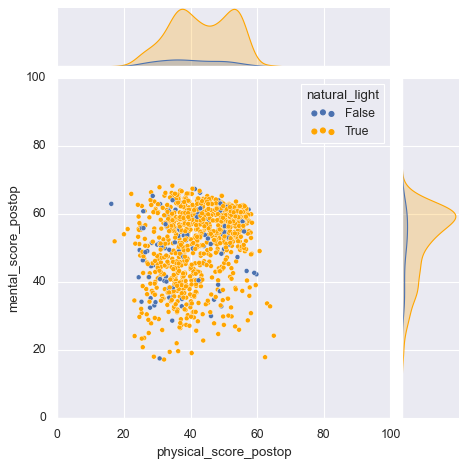

In [182]:
mental_physical_fig = sns.jointplot(data=df1, x="physical_score_postop", y="mental_score_postop", hue="natural_light", \
                                    xlim = (0,100), ylim = (0,100), palette = {False:'b', True:'orange'})


### Basic 2D Density Plot

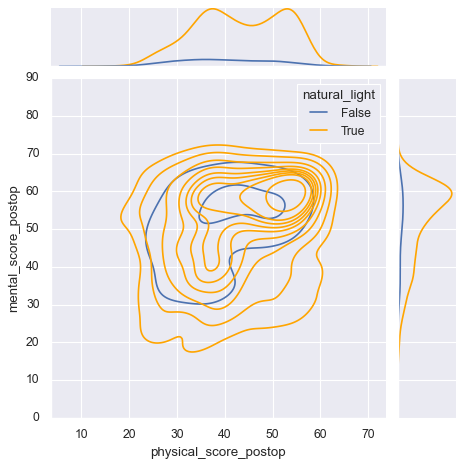

In [183]:
mental_physical_fig = sns.jointplot(data=df1, x="physical_score_postop", y="mental_score_postop", hue="natural_light", kind = 'kde', space = 0.2, palette = {False:'b', True:'orange'})

### Add the color, add shade and bandwidth

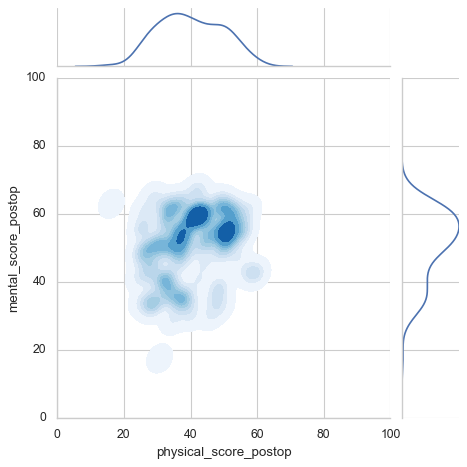

In [235]:
#https://www.python-graph-gallery.com/80-contour-plot-with-seaborn
sns.set_style("whitegrid")
#g = sns.FacetGrid(df1, col="natural_light")
#g.map(sns.jointplot, "physical_score_postop", "mental_score_postop", \
#      xlim = (0,100), ylim = (0,100), \
#      kind = 'kde', \
#      cmap="Blues", \
#      shade=True, \
#      thresh=0.01, \
#      bw_adjust=.5)
sns.jointplot(data = df1[df1['natural_light'] == False], x="physical_score_postop", y="mental_score_postop", \
                        xlim = (0,100), ylim = (0,100), \
                        kind = 'kde', \
                        cmap="Blues", \
                        shade=True, \
                        thresh=0.01, \
                        bw_adjust=.5)

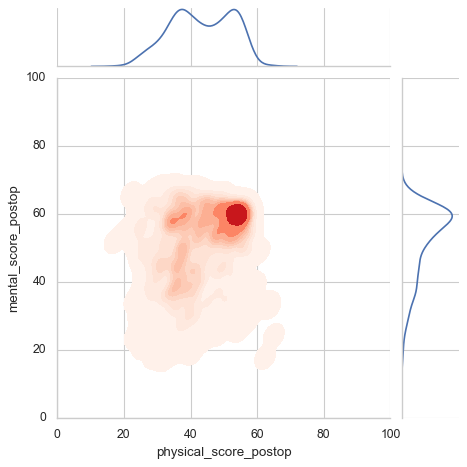

In [232]:
sns.jointplot(data = df1[df1['natural_light'] == True], x="physical_score_postop", y="mental_score_postop", \
                        xlim = (0,100), ylim = (0,100), \
                        kind = 'kde', \
                        cmap="Reds", \
                        shade=True, \
                        thresh=0.001, \
                        bw_adjust=.5)